In [6]:
import pandas as pd
df_cust=pd.read_csv('customers.csv',encoding='ISO-8859-1')
print(df_cust.head())

print(df_cust.isnull().sum())
df_cust['State Code'] = df_cust['State Code'].fillna('Unknown')

print(df_cust.isnull().sum())

df_cust['Birthday'] = pd.to_datetime(df_cust['Birthday'], errors='coerce')

df_cust['Age'] = (pd.Timestamp.now() - df_cust['Birthday']).dt.total_seconds() / (60*60*24*365.25)
df_cust['Age'] = df_cust['Age'].astype(int)

df_cust = df_cust.drop_duplicates(subset=[col for col in df_cust.columns if col not in ['CustomerKey']])

df_cust.to_csv('df_cust.csv', index=False)



   CustomerKey  Gender               Name            City State Code  \
0          301  Female      Lilly Harding  WANDEARAH EAST         SA   
1          325  Female       Madison Hull      MOUNT BUDD         WA   
2          554  Female      Claire Ferres       WINJALLOK        VIC   
3          786    Male  Jai Poltpalingada    MIDDLE RIVER         SA   
4         1042    Male    Aidan Pankhurst   TAWONGA SOUTH        VIC   

               State Zip Code    Country  Continent    Birthday  
0    South Australia     5523  Australia  Australia    7/3/1939  
1  Western Australia     6522  Australia  Australia   9/27/1979  
2           Victoria     3380  Australia  Australia   5/26/1947  
3    South Australia     5223  Australia  Australia   9/17/1957  
4           Victoria     3698  Australia  Australia  11/19/1965  
CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday 

In [3]:
print(df_cust.dtypes)

CustomerKey             int64
Gender                 object
Name                   object
City                   object
State Code             object
State                  object
Zip Code               object
Country                object
Continent              object
Birthday       datetime64[ns]
Age                     int64
dtype: object


In [4]:
df_cust

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,85
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,45
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,77
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,67
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,58
...,...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25,88
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16,32
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09,86
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12,87


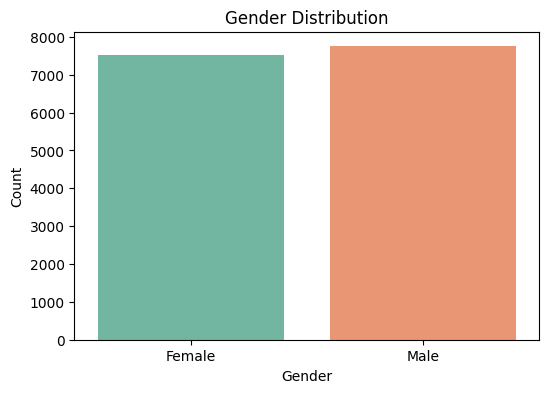

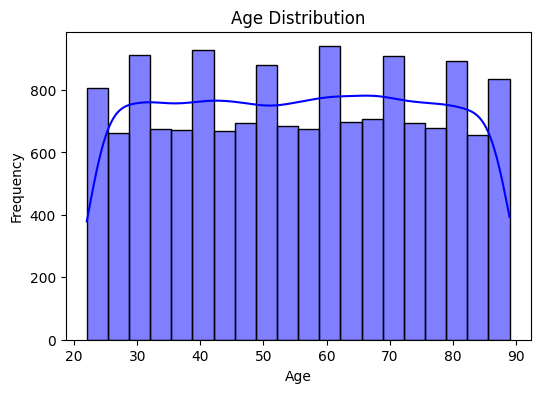

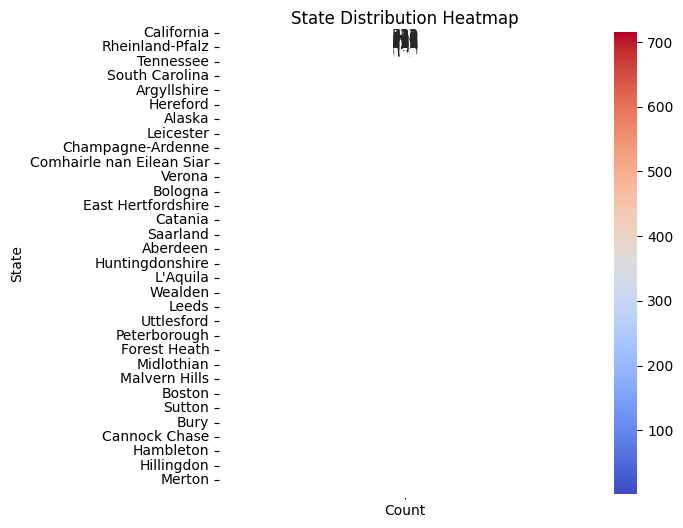

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_cust = pd.read_csv('df_cust.csv')


plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df_cust, hue='Gender', palette='Set2', legend=False)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(6, 4))
sns.histplot(df_cust['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
state_counts = df_cust['State'].value_counts()
state_counts_df = pd.DataFrame({'State': state_counts.index, 'Count': state_counts.values}).set_index('State')


plt.figure(figsize=(6,6))
sns.heatmap(state_counts_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt='d')
plt.title('State Distribution Heatmap')
plt.show()

In [8]:
import pandas as pd
df_sales= pd.read_csv('sales.csv',encoding='ISO-8859-1')
print (df_sales.head())

   Order Number  Line Item Order Date Delivery Date  CustomerKey  StoreKey  \
0        366000          1   1/1/2016           NaN       265598        10   
1        366001          1   1/1/2016     1/13/2016      1269051         0   
2        366001          2   1/1/2016     1/13/2016      1269051         0   
3        366002          1   1/1/2016     1/12/2016       266019         0   
4        366002          2   1/1/2016     1/12/2016       266019         0   

   ProductKey  Quantity Currency Code  
0        1304         1           CAD  
1        1048         2           USD  
2        2007         1           USD  
3        1106         7           CAD  
4         373         1           CAD  


In [9]:
print(df_sales.isnull().sum())

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64


In [5]:
print(df_sales.isnull().sum())

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64


In [6]:
df_sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,Unknown,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,Unknown,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [10]:

df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])
df_sales['Delivery Date'] = pd.to_datetime(df_sales['Delivery Date'])


median_delivery_date = df_sales['Delivery Date'].median()
df_sales['Delivery Date'].fillna(median_delivery_date, inplace=True)



print(missing_values = df_sales.isnull().sum())




print(df_sales.describe())


Missing values after cleaning:
Series([], dtype: int64)

Statistical Summary:
       Order Number     Line Item                     Order Date  \
count  6.288400e+04  62884.000000                          62884   
mean   1.430905e+06      2.164207  2018-11-30 21:21:56.939126016   
min    3.660000e+05      1.000000            2016-01-01 00:00:00   
25%    1.121017e+06      1.000000            2018-01-25 00:00:00   
50%    1.498016e+06      2.000000            2019-02-06 00:00:00   
75%    1.788010e+06      3.000000            2019-11-23 00:00:00   
max    2.243032e+06      7.000000            2021-02-20 00:00:00   
std    4.532963e+05      1.365170                            NaN   

                       Delivery Date   CustomerKey      StoreKey  \
count                          62884  6.288400e+04  62884.000000   
mean   2019-02-23 02:13:27.429552896  1.180797e+06     31.802144   
min              2016-01-06 00:00:00  3.010000e+02      0.000000   
25%              2019-03-05 00:00:00 

C:\Users\SABA ANBU\AppData\Local\Temp\ipykernel_12180\1615127355.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sales['Delivery Date'].fillna(median_delivery_date, inplace=True)


In [11]:
duplicates = df_sales.duplicated(subset=['Order Number', 'Line Item'])
print(f"Number of duplicate entries: {duplicates.sum()}")

Number of duplicate entries: 0


In [12]:
print(df_sales.dtypes)

Order Number              int64
Line Item                 int64
Order Date       datetime64[ns]
Delivery Date    datetime64[ns]
CustomerKey               int64
StoreKey                  int64
ProductKey                int64
Quantity                  int64
Currency Code            object
dtype: object


In [13]:
df_sales.to_csv('df_sales.csv', index=False)

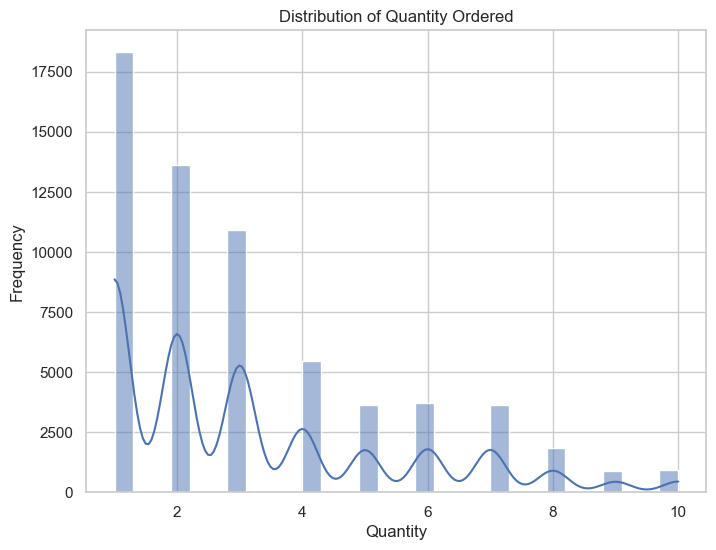

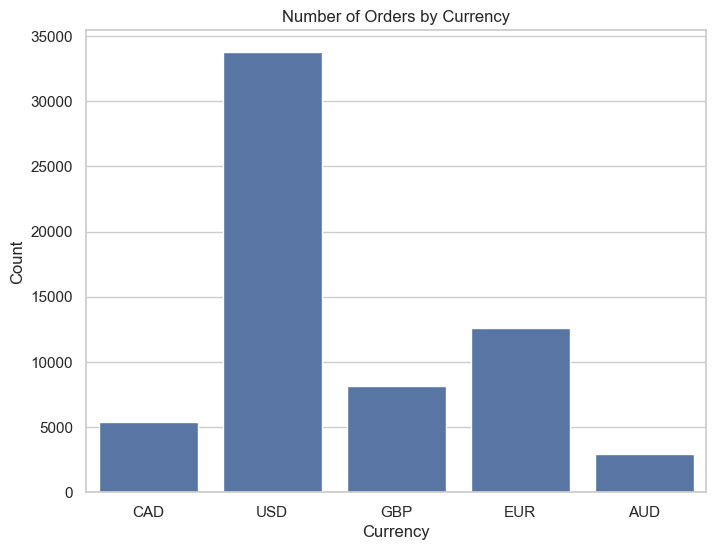

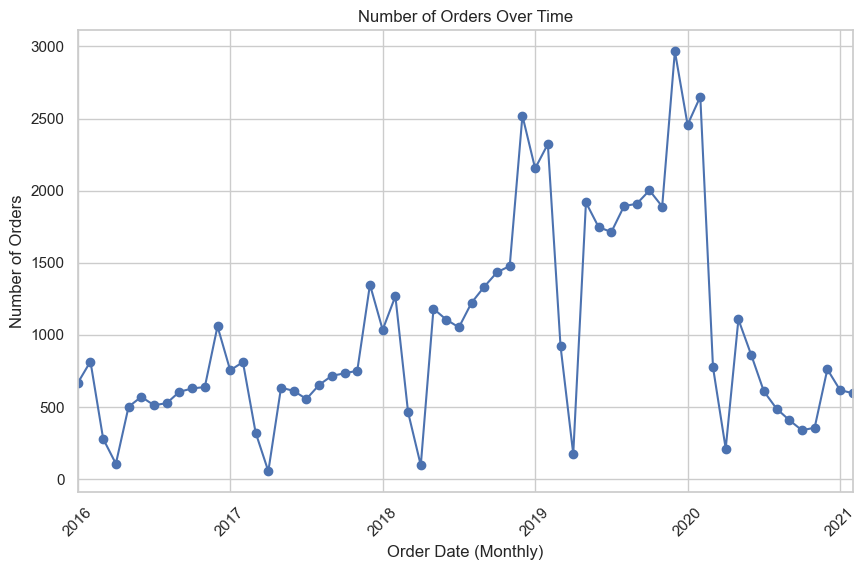

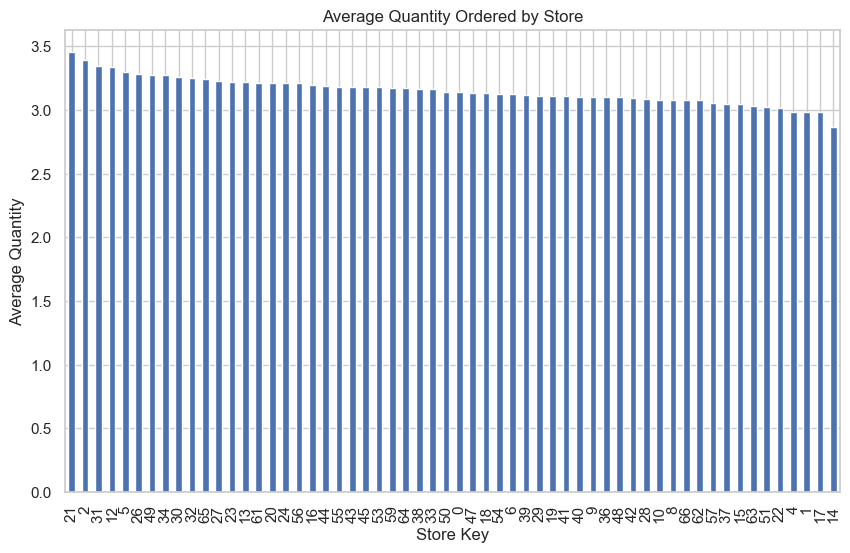

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(df_sales['Quantity'], bins=30, kde=True)
plt.title('Distribution of Quantity Ordered')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# 3. Count of orders by currency
plt.figure(figsize=(8,6))
sns.countplot(x='Currency Code', data=df_sales)
plt.title('Number of Orders by Currency')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.show()

# 4. Orders over time - showing the trend of orders placed
plt.figure(figsize=(10,6))
df_sales['Order Date'].groupby(df_sales['Order Date'].dt.to_period('M')).count().plot(kind='line', marker='o')
plt.title('Number of Orders Over Time')
plt.xlabel('Order Date (Monthly)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# 5. Average quantity ordered by store
avg_quantity_by_store = df_sales.groupby('StoreKey')['Quantity'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
avg_quantity_by_store.plot(kind='bar')
plt.title('Average Quantity Ordered by Store')
plt.xlabel('Store Key')
plt.ylabel('Average Quantity')
plt.show()

In [1]:
import pandas as pd
df_products= pd.read_csv('Products.csv',encoding='ISO-8859-1')
print (df_products.head())
print(df_products.info())
print(df_products.head())
print(df_products.describe(include='all'))

   ProductKey                         Product Name    Brand   Color  \
0           1  Contoso 512MB MP3 Player E51 Silver  Contoso  Silver   
1           2    Contoso 512MB MP3 Player E51 Blue  Contoso    Blue   
2           3     Contoso 1G MP3 Player E100 White  Contoso   White   
3           4    Contoso 2G MP3 Player E200 Silver  Contoso  Silver   
4           5       Contoso 2G MP3 Player E200 Red  Contoso     Red   

  Unit Cost USD Unit Price USD  SubcategoryKey Subcategory  CategoryKey  \
0        $6.62         $12.99              101     MP4&MP3            1   
1        $6.62         $12.99              101     MP4&MP3            1   
2        $7.40         $14.52              101     MP4&MP3            1   
3       $11.00         $21.57              101     MP4&MP3            1   
4       $11.00         $21.57              101     MP4&MP3            1   

  Category  
0    Audio  
1    Audio  
2    Audio  
3    Audio  
4    Audio  
<class 'pandas.core.frame.DataFrame'>
RangeI

In [2]:
print(df_products.isnull().sum())

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64


In [5]:
print(df_products['Product Name'].str.len().describe())

count    2517.000000
mean       40.675010
std        10.173693
min        19.000000
25%        33.000000
50%        40.000000
75%        48.000000
max        83.000000
Name: Product Name, dtype: float64


In [14]:
# Example of stripping whitespace and replacing problematic characters
df_products['Product Name'] = df_products['Product Name'].str.strip().str.replace(r'[^\w\s]', '', regex=True)


In [15]:
df_products

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso InLine Coupler E180 White,Contoso,White,1.71,3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso InLine Coupler E180 Black,Contoso,Black,1.71,3.35,505,Cell phones Accessories,5,Cell phones


In [7]:
print(df_products.dtypes)

ProductKey         int64
Product Name      object
Brand             object
Color             object
Unit Cost USD     object
Unit Price USD    object
SubcategoryKey     int64
Subcategory       object
CategoryKey        int64
Category          object
dtype: object


In [9]:
df_products

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso InLine Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso InLine Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [8]:
df_products.drop_duplicates(inplace=True)

In [10]:
for column in ['Unit Cost USD', 'Unit Price USD']:
    df_products[column] = df_products[column].str.replace('$', '').str.replace(',', '')

# Correcting Data Types (e.g., converting cost and price to numeric)
for column in ['Unit Cost USD', 'Unit Price USD']:
    try:
        df_products[column] = pd.to_numeric(df_products[column], errors='coerce')
        print(f"Converted {column} to numeric successfully.")
    except Exception as e:
        print(f"Error converting {column} to numeric: {e}")


Converted Unit Cost USD to numeric successfully.
Converted Unit Price USD to numeric successfully.


In [11]:
print(df_products.dtypes)

ProductKey          int64
Product Name       object
Brand              object
Color              object
Unit Cost USD     float64
Unit Price USD    float64
SubcategoryKey      int64
Subcategory        object
CategoryKey         int64
Category           object
dtype: object


In [12]:

print(df_products.info())
print(df_products.head())
print(df_products.describe(include='all'))
print(df_products.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB
None
   ProductKey                         Product Name    Brand   Color  \
0           1  Contoso 512MB MP3 Player E51 Silver  Contoso  Silver   
1           2    Contoso 512MB MP3 Player E51 Blue  Contoso    Blue   
2           3     Contoso 1G MP3 Player E100 White  Contoso   White   


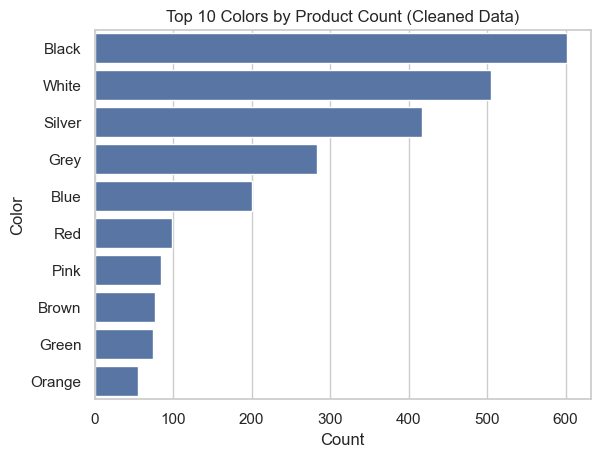

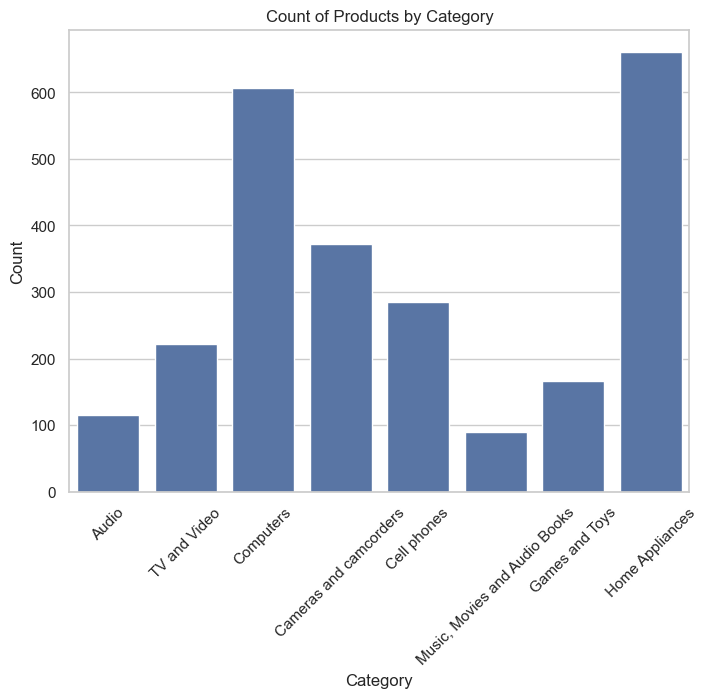

<Figure size 640x480 with 0 Axes>

In [33]:




# 3. Product Count by Color (Cleaned Data)
#plt.subplot(2, 2, 3)
sns.countplot(y='Color', data=df_products, order=df_products['Color'].value_counts().index[:10])
plt.title('Top 10 Colors by Product Count (Cleaned Data)')
plt.xlabel('Count')
plt.ylabel('Color')

if 'Category' in df_products.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x='Category', data=df_products)
    plt.title('Count of Products by Category')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()



plt.show()

Text(0, 0.5, 'Frequency')

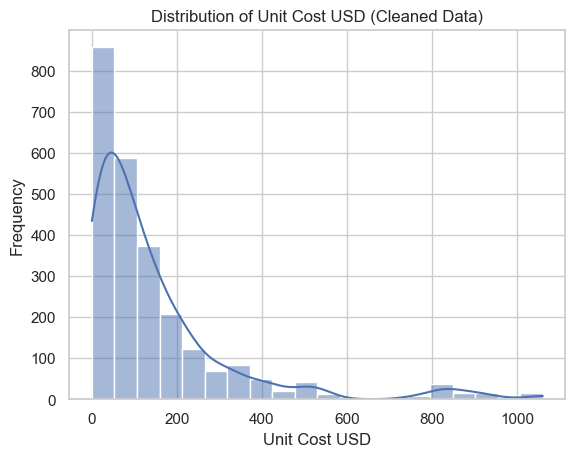

In [34]:

sns.histplot(df_products['Unit Cost USD'].dropna(), bins=20, kde=True)
plt.title('Distribution of Unit Cost USD (Cleaned Data)')
plt.xlabel('Unit Cost USD')
plt.ylabel('Frequency')

In [13]:
df_products.to_csv('df_products.csv', index=False)

In [45]:
import pandas as pd
df_stores= pd.read_csv('Stores.csv',encoding='ISO-8859-1')
print (df_stores.head())
print(df_stores.info())
print(df_stores.head())
print(df_stores.describe(include='all'))

   StoreKey    Country                         State  Square Meters  Open Date
0         1  Australia  Australian Capital Territory          595.0   1/1/2008
1         2  Australia            Northern Territory          665.0  1/12/2008
2         3  Australia               South Australia         2000.0   1/7/2012
3         4  Australia                      Tasmania         2000.0   1/1/2010
4         5  Australia                      Victoria         2000.0  12/9/2015
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB
None
   StoreKey    Country                         St

In [46]:
print(df_stores.isnull().sum())

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64


In [47]:
print(df_stores.dtypes)

StoreKey           int64
Country           object
State             object
Square Meters    float64
Open Date         object
dtype: object


In [49]:
#df_stores['Square Meters'].fillna(0, inplace=True)
df_stores['Square Meters'] = df_stores['Square Meters'].fillna(0)


# Correcting Data Types
df_stores['Open Date'] = pd.to_datetime(df_stores['Open Date'], errors='coerce')

# Removing Duplicates (excluding primary key)
df_stores = df_stores.drop_duplicates(subset=[col for col in df_stores.columns if col not in ['StoreKey']])


In [50]:
print(df_stores.dtypes)
print(df_stores.isnull().sum())

StoreKey                  int64
Country                  object
State                    object
Square Meters           float64
Open Date        datetime64[ns]
dtype: object
StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
dtype: int64


In [51]:
df_stores.to_csv('df_stores.csv', index=False)

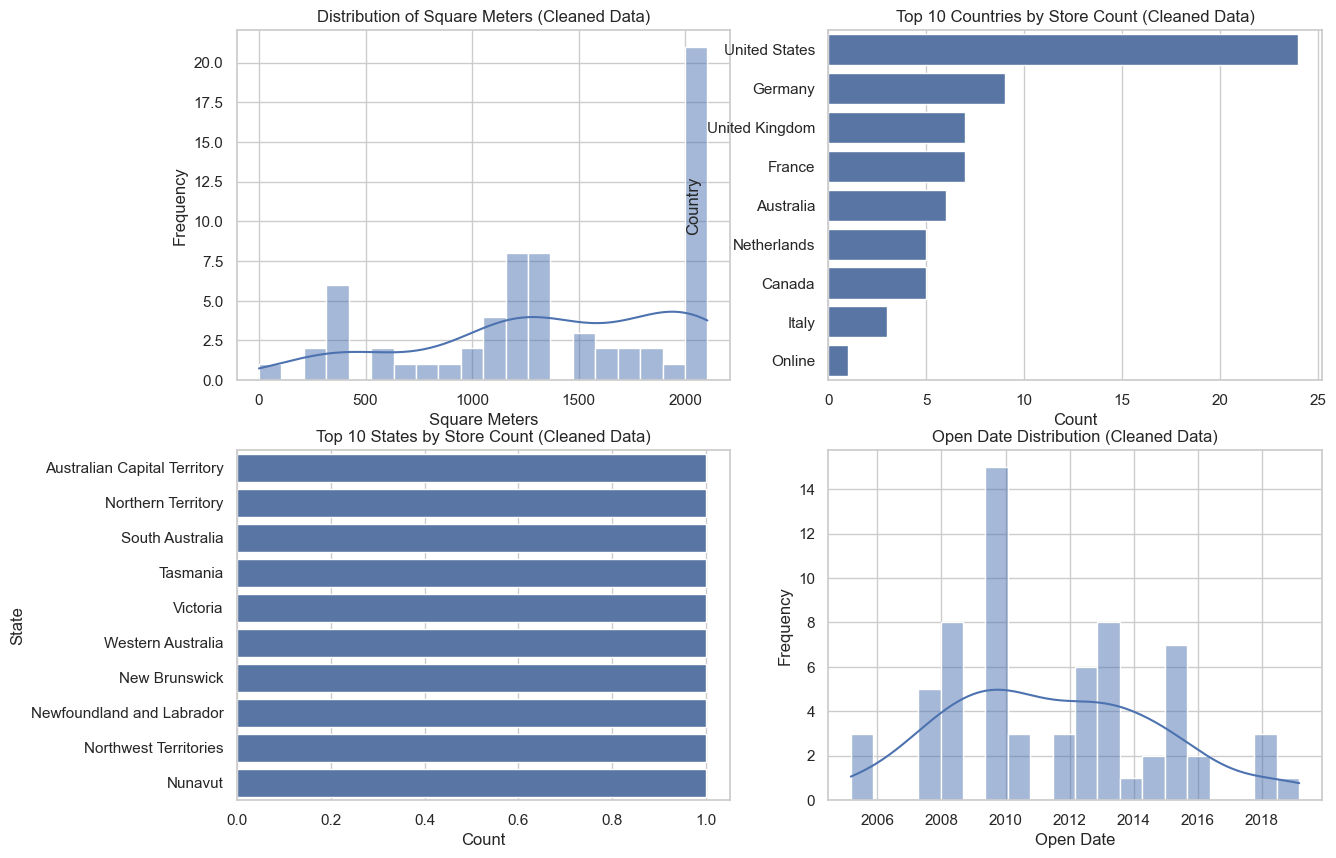

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 10))

# 1. Distribution of Square Meters (Cleaned Data)
plt.subplot(2, 2, 1)
sns.histplot(df_stores['Square Meters'].dropna(), bins=20, kde=True)
plt.title('Distribution of Square Meters (Cleaned Data)')
plt.xlabel('Square Meters')
plt.ylabel('Frequency')

# 2. Stores by Country (Top 10 Countries) (Cleaned Data)
plt.subplot(2, 2, 2)
if 'Country' in df_stores.columns:
    sns.countplot(y='Country', data=df_stores, order=df_stores['Country'].value_counts().index[:10])
    plt.title('Top 10 Countries by Store Count (Cleaned Data)')
    plt.xlabel('Count')
    plt.ylabel('Country')
else:
    print("Column 'Country' is not present in the cleaned dataset.")

# 3. Stores by State (Top 10 States) (Cleaned Data)
plt.subplot(2, 2, 3)
if 'State' in df_stores.columns:
    sns.countplot(y='State', data=df_stores, order=df_stores['State'].value_counts().index[:10])
    plt.title('Top 10 States by Store Count (Cleaned Data)')
    plt.xlabel('Count')
    plt.ylabel('State')
else:
    print("Column 'State' is not present in the cleaned dataset.")

# 4. Open Date Distribution (Cleaned Data)
plt.subplot(2, 2, 4)
if 'Open Date' in df_stores.columns:
    sns.histplot(df_stores['Open Date'].dropna(), bins=20, kde=True)
    plt.title('Open Date Distribution (Cleaned Data)')
    plt.xlabel('Open Date')
    plt.ylabel('Frequency')
else:
    print("Column 'Open Date' is not present in the cleaned dataset.")

In [2]:
import pandas as pd
df_erates=pd.read_csv('Exchange_Rates.csv',encoding='ISO-8859-1')
print("EDA on Raw Data")
print(df_erates.info())
print(df_erates.head())
print(df_erates.describe(include='all'))
print(df_erates.isnull().sum())

EDA on Raw Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB
None
       Date Currency  Exchange
0  1/1/2015      USD    1.0000
1  1/1/2015      CAD    1.1583
2  1/1/2015      AUD    1.2214
3  1/1/2015      EUR    0.8237
4  1/1/2015      GBP    0.6415
             Date Currency      Exchange
count       11215    11215  11215.000000
unique       2243        5           NaN
top     2/20/2021      USD           NaN
freq            5     2243           NaN
mean          NaN      NaN      1.061682
std           NaN      NaN      0.245519
min           NaN      NaN      0.628500
25%           NaN      NaN      0.857800
50%           NaN      NaN      1.000000
75%           NaN      NaN

In [58]:
print(df_erates.dtypes)

Date        datetime64[ns]
Currency            object
Exchange           float64
dtype: object


In [3]:
df_erates['Date'] = pd.to_datetime(df_erates['Date'], errors='coerce')

In [4]:
df_erates.drop_duplicates(inplace=True)


df_erates.to_csv('df_erates.csv', index=False)


In [5]:
df_erates

,Date,Currency,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415
...,...,...,...
11210,2021-02-20,USD,1.0000
11211,2021-02-20,CAD,1.2610
11212,2021-02-20,AUD,1.2723
11213,2021-02-20,EUR,0.8238


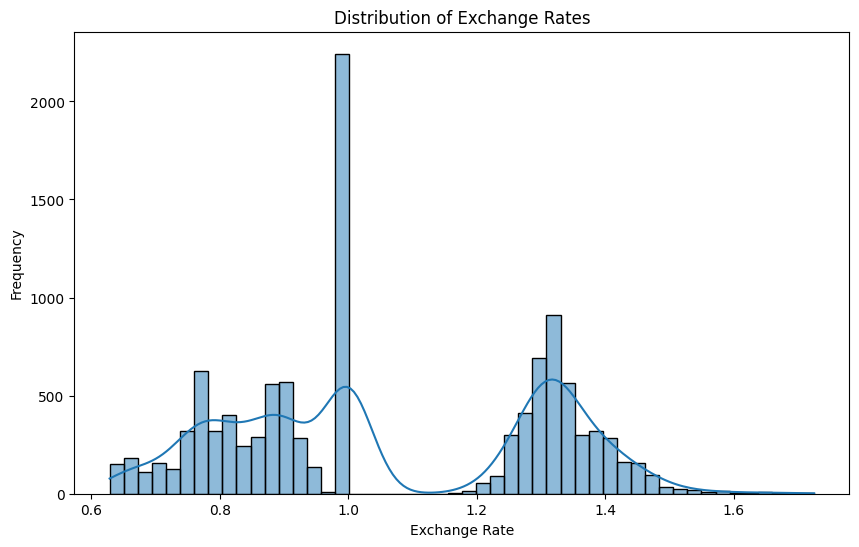

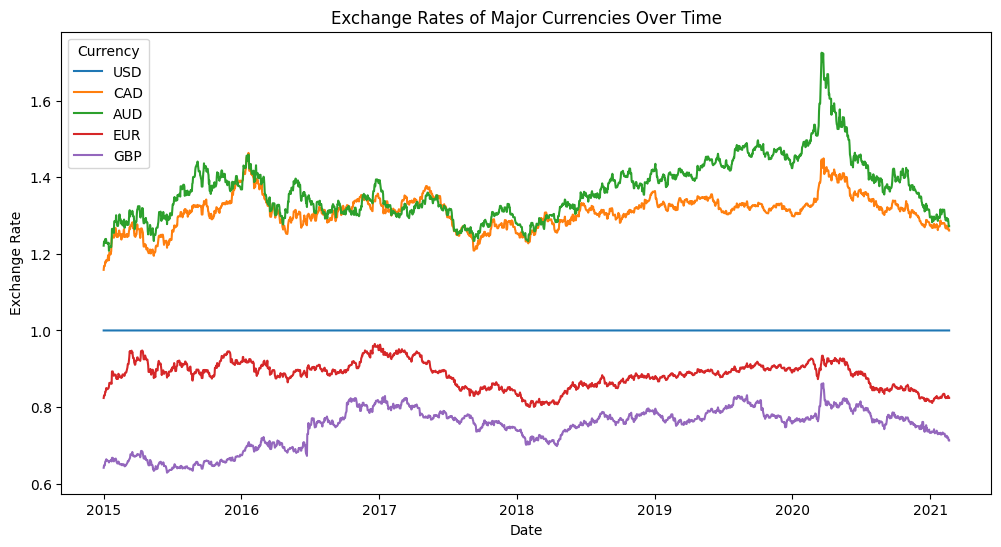

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot 1: Distribution of Exchange Rates
plt.figure(figsize=(10, 6))
sns.histplot(df_erates['Exchange'], bins=50, kde=True)
plt.title('Distribution of Exchange Rates')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')
plt.show()


major_currencies = ['USD', 'EUR', 'GBP', 'CAD', 'AUD']
df_major = df_erates[df_erates['Currency'].isin(major_currencies)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_major, x='Date', y='Exchange', hue='Currency')
plt.title('Exchange Rates of Major Currencies Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend(title='Currency')
plt.show()


In [11]:
import pandas as pd

sales= pd.read_csv('df_sales.csv')
customers = pd.read_csv('df_Cust.csv')


sales_customers = pd.merge(sales, customers, on='CustomerKey', how='inner')


sales_customers.to_csv('Sales_Customers.csv', index=False)

print(sales_customers.head())

   Order Number  Line Item  Order Date Delivery Date  CustomerKey  StoreKey  \
0        366000          1  2016-01-01    2019-03-05       265598        10   
1        366001          1  2016-01-01    2016-01-13      1269051         0   
2        366001          2  2016-01-01    2016-01-13      1269051         0   
3        366002          1  2016-01-01    2016-01-12       266019         0   
4        366002          2  2016-01-01    2016-01-12       266019         0   

   ProductKey  Quantity Currency Code  Gender            Name      City  \
0        1304         1           CAD    Male    Tyler Vaught    London   
1        1048         2           USD    Male  Frank Upchurch   Auberry   
2        2007         1           USD    Male  Frank Upchurch   Auberry   
3        1106         7           CAD  Female      Joan Roche  Red Deer   
4         373         1           CAD  Female      Joan Roche  Red Deer   

  State Code       State Zip Code        Country      Continent    Birthda

In [13]:
print(sales_customers.columns)

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'Gender', 'Name', 'City', 'State Code', 'State', 'Zip Code', 'Country',
       'Continent', 'Birthday', 'Age'],
      dtype='object')


In [15]:
import pandas as pd
sales_customers = pd.read_csv('Sales_Customers.csv', encoding='ISO-8859-1')


stores = pd.read_csv('df_stores.csv', encoding='ISO-8859-1')


sales_customers_stores = pd.merge(sales_customers, stores, on='StoreKey', how='inner')

print(sales_customers_stores.head())


sales_customers_stores.to_csv('Sales_Customers_Stores.csv', index=False)

   Order Number  Line Item  Order Date Delivery Date  CustomerKey  StoreKey  \
0        366000          1  2016-01-01    2019-03-05       265598        10   
1        366001          1  2016-01-01    2016-01-13      1269051         0   
2        366001          2  2016-01-01    2016-01-13      1269051         0   
3        366002          1  2016-01-01    2016-01-12       266019         0   
4        366002          2  2016-01-01    2016-01-12       266019         0   

   ProductKey  Quantity Currency Code  Gender  ...     State_x Zip Code  \
0        1304         1           CAD    Male  ...     Ontario  N5W 5K6   
1        1048         2           USD    Male  ...  California    93602   
2        2007         1           USD    Male  ...  California    93602   
3        1106         7           CAD  Female  ...     Alberta  T4N 2A6   
4         373         1           CAD  Female  ...     Alberta  T4N 2A6   

       Country_x      Continent    Birthday Age Country_y  State_y  \
0   

In [16]:
print(sales_customers_stores.columns)

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'Gender', 'Name', 'City', 'State Code', 'State_x', 'Zip Code',
       'Country_x', 'Continent', 'Birthday', 'Age', 'Country_y', 'State_y',
       'Square Meters', 'Open Date'],
      dtype='object')


In [17]:
duplicates = sales_customers_stores.duplicated()
print(sales_customers_stores.duplicated().sum())

0


In [18]:
print(sales_customers_stores.isnull().sum())

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
Gender           0
Name             0
City             0
State Code       0
State_x          0
Zip Code         0
Country_x        0
Continent        0
Birthday         0
Age              0
Country_y        0
State_y          0
Square Meters    0
Open Date        0
dtype: int64


In [21]:
import pandas as pd


sales_customers_stores = pd.read_csv('Sales_Customers_Stores.csv', encoding='ISO-8859-1')
products = pd.read_csv('df_products.csv', encoding='ISO-8859-1')

merged_data= pd.merge(sales_customers_stores, products, on='ProductKey', how='inner')


print(merged_data.head())


merged_data.to_csv('Merged_Data.csv', index=False)

   Order Number  Line Item  Order Date Delivery Date  CustomerKey  StoreKey  \
0        366000          1  2016-01-01    2019-03-05       265598        10   
1        366001          1  2016-01-01    2016-01-13      1269051         0   
2        366001          2  2016-01-01    2016-01-13      1269051         0   
3        366002          1  2016-01-01    2016-01-12       266019         0   
4        366002          2  2016-01-01    2016-01-12       266019         0   

   ProductKey  Quantity Currency Code  Gender  ...   Open Date  \
0        1304         1           CAD    Male  ...  2015-04-04   
1        1048         2           USD    Male  ...  2010-01-01   
2        2007         1           USD    Male  ...  2010-01-01   
3        1106         7           CAD  Female  ...  2010-01-01   
4         373         1           CAD  Female  ...  2010-01-01   

                             Product Name            Brand   Color  \
0         Contoso Lens Adapter M450 White          Contoso

In [23]:
print(merged_data.isnull().sum())

Order Number      0
Line Item         0
Order Date        0
Delivery Date     0
CustomerKey       0
StoreKey          0
ProductKey        0
Quantity          0
Currency Code     0
Gender            0
Name              0
City              0
State Code        0
State_x           0
Zip Code          0
Country_x         0
Continent         0
Birthday          0
Age               0
Country_y         0
State_y           0
Square Meters     0
Open Date         0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64


In [24]:
print(merged_data.duplicated().sum())

0
